| PROJECT TITLE | MUSHROOM CLASSIFICATION |
|----------|----------|
| TECHNOLOGIES| MACHINE LEARNING TECHNOLOGY|
|DOMAIN|AGRICULTURE|
|PROJECT DEFICULTIES LEVEL|INTERMEDIATE|
|NAME|PRODIP SARKAR|
|EMAIL ID|prodip1023@gmail.com|
|GITHUB LINK|https://github.com/prodip1023|
|DATE CREATED| 25th February, 2024|
|DATE MODIFIED| 27th February, 2024|
|KAGGLE LINK|https://www.kaggle.com/prodip1023|
|LINKEDN LINK|https://www.linkedin.com/in/prodip1023/|

# Problem Statement:
The Audubon Society Field Guide to North American Mushrooms contains descriptions
of hypothetical samples corresponding to 23 species of gilled mushrooms in the 
Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either 
definitely edible, definitely poisonous, or maybe edible but not recommended. This last 
category was merged with the toxic category. The Guide asserts unequivocally that 
there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it 
be" for Poisonous Oak and Ivy.
The main goal is to predict which mushroom is poisonous & which is edible.

# Approach: 
The classical machine learning tasks like Data Exploration, Data Cleaning, 
Feature Engineering, Model Building and Model Testing. Try out different machine 
learning algorithms that’s best fit for the above case.

# Goal: 
I am constructing the ideal model for predicting which mushrooms are poisonous and which are edible.

In [12]:
# install libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')


In [14]:
# Load the data 
df = pd.read_csv('Data/mushrooms.csv')

In [15]:
# First 5 rows
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
# Last 5 rows
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [17]:
# 5 random rows
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3699,p,x,s,p,f,c,f,c,n,g,...,s,w,w,p,w,o,p,n,v,d
6540,p,x,s,e,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,d
2415,e,x,y,n,t,n,f,c,b,p,...,s,p,p,p,w,o,p,k,y,d
3430,e,f,y,g,t,n,f,c,b,p,...,s,p,w,p,w,o,p,n,v,d
71,e,b,y,w,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,s,m


In [18]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [19]:
# Showing all the columns
pd.set_option('display.max_columns', None)

In [21]:
# Describe the data
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [24]:
# Shape of the dataset
print("Dataset shape:", df.shape)
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Dataset shape: (8124, 23)
Number of Rows: 8124
Number of Columns: 23


In [28]:
# count of edible and poisonous mushrooms
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [32]:
# unique number
df["class"].unique()

array(['p', 'e'], dtype=object)

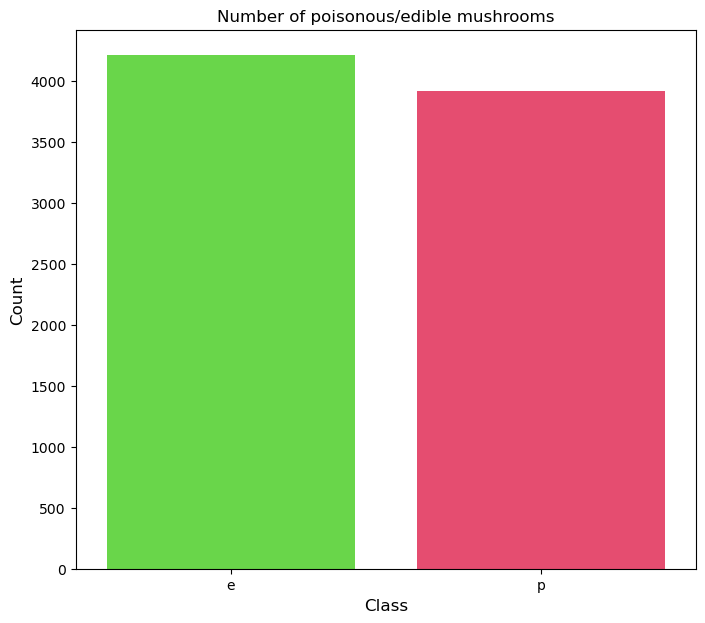

In [41]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.savefig("images/mashroom_1.jpeg", format='png', dpi=900)
plt.show()

- The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.
- This approach requires the category column to be of ‘category’ datatype.
- By default, a non-numerical column is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. 
- So we will have to change the type to ‘category’ before using this approach.

In [43]:
df = df.astype('category')

In [44]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [45]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [47]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
